## 4.2.2. 데이터 분석 및 전처리

https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/blob/master/4.TEXT_CLASSIFICATION/4.2.2.EDA%26preprocessing.ipynb

### 데이터 분석하기

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://colab.research.google.com/drive/1ImoSPFY-2l3JCaNDzzb1ivxVBhuXQnO8
from pathlib import Path
import json
def read_klue(path):
    path = Path(path)
    with open(path, 'rb') as f:
        squad_dict = json.load(f)

    contexts = []
    questions = []
    answers = []
    guids = []
    for group in squad_dict['data']:
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                #print(qa)
                for answer in qa['answers']:
                    contexts.append(context)
                    questions.append(question)
                    answers.append({"answer_start":[answer["answer_start"]],"text":[answer["text"]]})
                    #print(qa["guid"])
                    guids.append(qa["guid"])

    return guids ,contexts, questions, answers

In [ ]:
import pandas as pd

file_path =  '/content/drive/MyDrive/Goorm_Deep_Learning/Projects/project2/Data/train.json'

guids,contexts, questions, answers = read_klue(file_path)
train_data = pd.DataFrame(list(zip(guids , answers, contexts, questions)),
               columns =['id','answers', 'context','question'])
train_data

,id,answers,context,question
0,798db07f0b9046759deed9d4a35ce31e,"{'answer_start': [478], 'text': ['한 달가량']}",올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년보다 사나흘 정도...,북태평양 기단과 오호츠크해 기단이 만나 국내에 머무르는 기간은?
1,798db07f0b9046759deed9d4a35ce31e,"{'answer_start': [478], 'text': ['한 달']}",올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년보다 사나흘 정도...,북태평양 기단과 오호츠크해 기단이 만나 국내에 머무르는 기간은?
2,67c85e4f86ae43939b807684537c909c,"{'answer_start': [1422], 'text': ['삼보테크놀로지']}",부산시와 (재)부산정보산업진흥원(원장 이인숙)이 ‘2020~2021년 지역SW서비스...,지능형 생산자동화 기반기술을 개발중인 스타트업은?
3,d2764543b0a84596942b34071541bed4,"{'answer_start': [107], 'text': ['와쿠이 히데아키']}",시범 경기에서는 16이닝을 던져 15실점을 기록하는 등 성적이 좋지 않았지만 본인으...,개막전에서 3안타 2실점을 기록해서 패한 선수는?
4,435aa49b68e8414d8c5e4f8102782b81,"{'answer_start': [408], 'text': ['‘교동반점 짬뽕’']}",유명 맛집 이름을 달고 나온 편의점 자체상표(PB) 라면이 인기를 끌고 있다. ‘검...,컵라면 매출에서 불닭볶음면을 이긴 상품은?
...,...,...,...,...
17658,43662d491d8e42b6a92255afd11e0634,"{'answer_start': [170], 'text': ['‘혹성탈출: 반격의 서...",유인원 무리의 리더 시저는 인간 건축가 말콤(제이슨 클락)에게 작별 인사를 한다. ...,혹성탈출의 두 번째 프리퀄의 제목은?
17659,43662d491d8e42b6a92255afd11e0634,"{'answer_start': [171], 'text': ['혹성탈출: 반격의 서막']}",유인원 무리의 리더 시저는 인간 건축가 말콤(제이슨 클락)에게 작별 인사를 한다. ...,혹성탈출의 두 번째 프리퀄의 제목은?
17660,6e16e6a74b40457883771416d3522dc4,"{'answer_start': [197], 'text': ['8시 10분']}",ASUS(에이수스) 그래픽카드 공식수입사 인텍앤컴퍼니(대표 서정욱)는 10월 16일...,인택엔컴퍼니가 실시하는 추첨판매 신청 마감시간은?
17661,ea6f9861cab94491b1df195b75e29558,"{'answer_start': [276], 'text': ['28개']}",한국인 최초로 쇼팽국제피아노콩쿠르에서 우승을 차지한 ‘21세 쇼팽’ 조성진 마케팅이...,유니버셜뮤직과 협력하여 만든 메가기프트를 살 수 있는 업체의 매장 수는?


In [ ]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 17663


In [ ]:
len("안녕하세요 봄이 왔네요!")

13

In [ ]:
train_length = train_data['context'].astype(str).apply(len)

In [ ]:
train_length.head()

0     728
1     728
2    1873
3     854
4     838
Name: context, dtype: int64

Text(0, 0.5, 'Number of context')

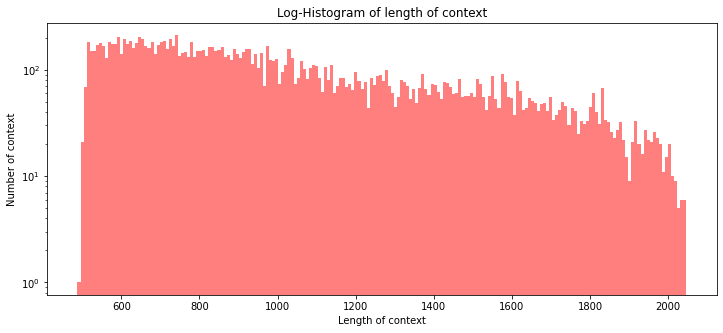

In [ ]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of context')
# 그래프 x 축 라벨
plt.xlabel('Length of context')
# 그래프 y 축 라벨
plt.ylabel('Number of context')

In [ ]:
print('context 길이 최대 값: {}'.format(np.max(train_length)))
print('context길이 최소 값: {}'.format(np.min(train_length)))
print('context 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('context 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('context 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('context 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('context 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

context 길이 최대 값: 2046
context길이 최소 값: 488
context 길이 평균 값: 1025.73
context 길이 표준편차: 384.40
context 길이 중간 값: 931.0
context 길이 제 1 사분위: 707.0
context 길이 제 3 사분위: 1296.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fb261eb5e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb261ec5e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2636c8450>],
 'means': [<matplotlib.lines.Line2D at 0x7fb2636c3ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2636c3990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb261eb54d0>,
  <matplotlib.lines.Line2D at 0x7fb261ec5950>]}

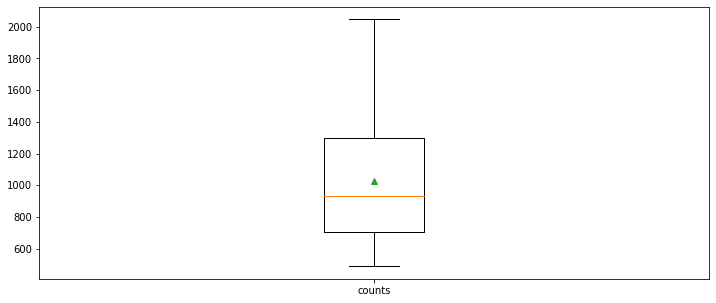

In [ ]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

In [ ]:
train_word_counts = train_data['context'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of context')

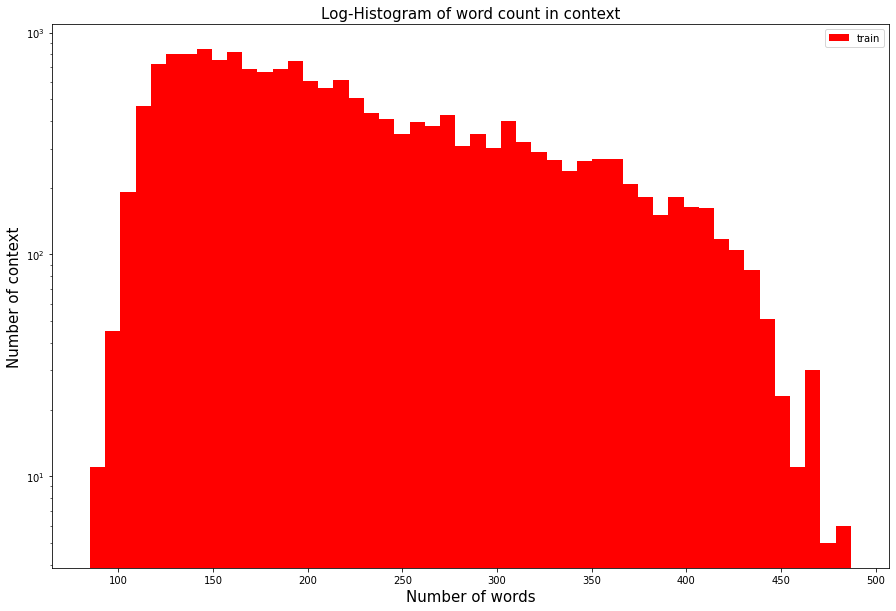

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in context', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of context', fontsize=15)

In [ ]:
print('context 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('context 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('context 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('context 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('context 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('context 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('context 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

context 단어 개수 최대 값: 487
context 단어 개수 최소 값: 85
context 단어 개수 평균 값: 226.04
context 단어 개수 표준편차: 85.93
context 단어 개수 중간 값: 205.0
context 단어 개수 제 1 사분위: 155.0
context 단어 개수 제 3 사분위: 287.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fb25f5c4110>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb25f5a41d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb25f5c6750>],
 'means': [<matplotlib.lines.Line2D at 0x7fb25f5c6210>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb25f5a4c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb25f5c4710>,
  <matplotlib.lines.Line2D at 0x7fb25f5c4c50>]}

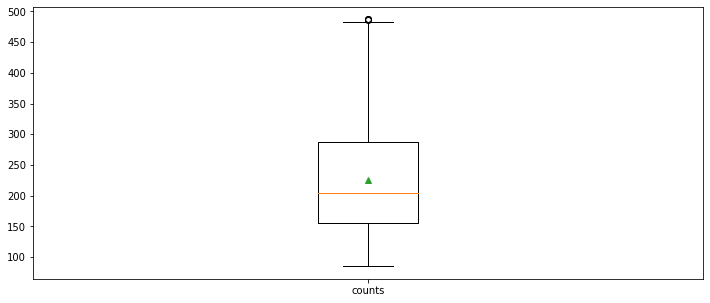

In [ ]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [ ]:
qmarks = np.mean(train_data['context'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['context'].astype(str).apply(lambda x: '.' in x)) # 마침표
dash= np.mean(train_data['context'].astype(str).apply(lambda x: '/' in x))                  
print('물음표가있는 context: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 context: {:.2f}%'.format(fullstop * 100))
print('/가 있는 context: {:.2f}%'.format(dash* 100))

물음표가있는 context: 2.46%
마침표가 있는 context: 99.99%
/가 있는 context: 6.45%


### 데이터 전처리

In [ ]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [ ]:
DATA_IN_PATH ='./data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3 )

print(train_data.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


In [ ]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", train_data['document'][0]) 
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [ ]:
okt=Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [ ]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['더빙', '진짜', '짜증나다', '목소리']


In [ ]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])

In [ ]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
   
    return word_review

In [ ]:
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

In [ ]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter='\t', quoting=3 )

clean_test_review = []

for review in test_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태
word_vocab["<PAD>"] = 0

In [ ]:
MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 벡터화
train_labels = np.array(train_data['label']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 테스트 데이터를 벡터화
test_labels = np.array(test_data['label']) # 테스트 데이터의 라벨

In [ ]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)